### Budget independence
---

In [3]:
import numpy as np
import torch

In [4]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
# set fonttype
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype']  = 42

%matplotlib inline

### Plots
---

To run these cells one needs to have saved results after the launch of the scripts

In [5]:
N = 10000
n_steps = 10000
dataset = 'mnist'
momentum = 0.0
# provide path to the experiment dir
exp_root_dir = '../output'
exp_name = 'bugdet_independence'

In [8]:
data_dir = f'output/linearized/{exp_name}/N={N}/{dataset}/momentum={momentum}'
loss_curves_mnist = torch.load(f'{data_dir}/loss_curves.pth')

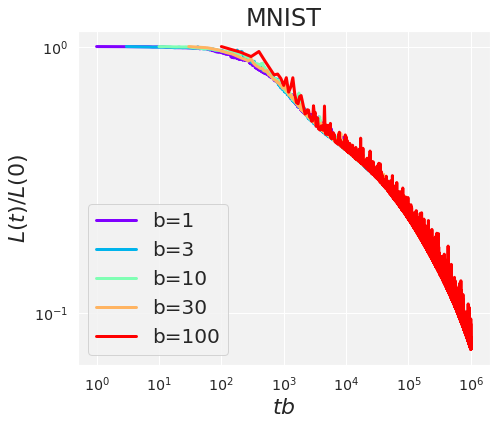

In [9]:
fig, ax = plt.subplots(figsize=(7, 6))

steps = np.arange(1, n_steps + 2)

cmap = plt.cm.get_cmap('rainbow', 5)

for j, (batch_size, alpha, beta) in enumerate(loss_curves_mnist):
    costs = batch_size * steps
    loss_curve = np.array(loss_curves_mnist[(batch_size, alpha, beta)])
    ax.plot(costs, loss_curve / loss_curve[0], label=f'b={batch_size}', color=cmap(j), linewidth=3)

ax.legend(loc='lower left', fontsize=20);
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel(r'$t b$', fontsize=22);
ax.set_ylabel(r'$L(t) / L(0)$', fontsize=22);
ax.set_title('MNIST', fontsize=24);

plt.tight_layout()
plt.savefig(f'plots/mnist/budget_independence.pdf')